In [1]:
import cv2
import matplotlib.pyplot as plt


In [12]:
vid = cv2.VideoCapture(0)

In [13]:
vid.isOpened()


True

In [14]:
k = vid.read()


In [13]:
type(k), len(k)

(tuple, 2)

In [14]:
k

(True,
 array([[[22, 41, 41],
         [21, 40, 38],
         [19, 39, 36],
         ...,
         [20, 20, 21],
         [22, 20, 24],
         [26, 24, 27]],
 
        [[22, 41, 41],
         [21, 40, 39],
         [21, 40, 38],
         ...,
         [20, 20, 21],
         [22, 20, 24],
         [25, 24, 27]],
 
        [[24, 44, 43],
         [22, 41, 40],
         [21, 40, 39],
         ...,
         [19, 20, 21],
         [19, 19, 23],
         [24, 24, 27]],
 
        ...,
 
        [[19, 10,  5],
         [19, 10,  5],
         [19, 10,  5],
         ...,
         [ 2,  1,  0],
         [ 3,  3,  2],
         [ 5,  4,  3]],
 
        [[19, 10,  5],
         [19, 10,  5],
         [18,  9,  4],
         ...,
         [ 2,  1,  0],
         [ 3,  3,  2],
         [ 5,  4,  3]],
 
        [[18,  9,  4],
         [18,  9,  4],
         [18,  9,  4],
         ...,
         [ 3,  3,  2],
         [ 3,  3,  2],
         [ 5,  4,  3]]], dtype=uint8))

In [33]:
flag,img = vid.read()


In [34]:
flag

True

In [17]:
img

array([[[133, 145, 134],
        [133, 145, 134],
        [133, 145, 134],
        ...,
        [113,  96,  93],
        [114, 100,  97],
        [122, 108, 106]],

       [[134, 145, 134],
        [134, 145, 134],
        [134, 145, 134],
        ...,
        [112,  96,  94],
        [113,  99,  98],
        [122, 108, 106]],

       [[136, 146, 133],
        [136, 146, 133],
        [136, 146, 133],
        ...,
        [111,  96,  94],
        [116, 103, 102],
        [124, 111, 111]],

       ...,

       [[169, 164, 157],
        [174, 163, 150],
        [148, 131, 113],
        ...,
        [ 49,  38,  33],
        [ 48,  36,  32],
        [ 48,  36,  32]],

       [[169, 162, 154],
        [172, 158, 145],
        [143, 122, 105],
        ...,
        [ 45,  34,  29],
        [ 44,  33,  28],
        [ 43,  32,  27]],

       [[170, 162, 154],
        [169, 154, 142],
        [142, 120, 102],
        ...,
        [ 43,  33,  28],
        [ 43,  32,  27],
        [ 42,  31,  26]]

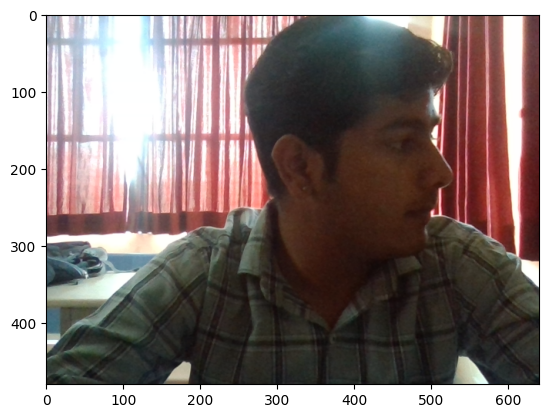

In [35]:
if flag:
    plt.imshow(img[:,:,::-1])

In [9]:
ord('a')

97

In [11]:
vid.release()

In [37]:
vid = cv2.VideoCapture(0)
while True:
    flag,img = vid.read()
    if flag:
        #processing code
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        th,img_bw = cv2.threshold(img_gray,170,255,cv2.THRESH_BINARY)
        x,y,w,h = (250,200,100,100)
        img_cropped = img[y:y+h,x:x+w,:]
        cv2.rectangle(img,pt1=(x,y),pt2=(x+w,y+h),color=(255,0,0))
        # print(type(img_gray))
        # break

        # cv2.imshow('preview',img_bw)
        # cv2.imshow('preview',img_gray)
        # cv2.imshow('preview',img_cropped)
        cv2.imshow('preview',img)
        key = cv2.waitKey(1)
        if key == ord('q'):
            break
    else:
        print("no frames")
        break
vid.release()    
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib as plt
from time import sleep

fd = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
sm = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')
# face = fd.detectMul
vid = cv2.VideoCapture(0)
captured = True
while captured:
    flag,img = vid.read()
    if flag:
        #processing code
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = fd.detectMultiScale(img_gray,1.1,5)
        smiles = sm.detectMultiScale(img_gray,1.1,5)
        # th,img_bw = cv2.threshold(img_gray,170,255,cv2.THRESH_BINARY)
        # m = np.random.randint(0,256)
        # n = np.random.randint(0,256)
        # o = np.random.randint(0,256)
        np.random.seed(50)
        colors = [np.random.randint(0,256,3).tolist() for i in smiles]
        i=0
        for x,y,w,h in faces:
            face = faces[y:y+h,x:x+w].copy()
            smiles = sm.detectMultiScale(
                face,
                scaleFactor = 1.1,
                minNeighbors = 5,
                minSize = (50,50)
            )
            if(len(smiles) == 1):
                cv2.imwrite('myselfie.png'.img)
                captured = False

            cv2.rectangle(
                # d=
                img, pt1 = (x,y), pt2=(x+w,y+h), color=colors[i],thickness=8
            )
            i+=1
        
        cv2.imshow('preview',img)
        key = cv2.waitKey(1)
        if key == ord('q'):
            break
    else:
        print("no frames")
        break
vid.release()    
cv2.destroyAllWindows()

In [2]:
import numpy as np